In [301]:
from matplotlib import rcParams
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.stats import gaussian_kde
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# 设置中文字体，例如 SimHei（黑体）或 Microsoft YaHei（微软雅黑）
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False   # 解决坐标轴负号显示问题

# 1. 加载数据
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
file_path = "Dataset.csv"
data.to_csv(file_path, index=False)
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2140\553697241.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




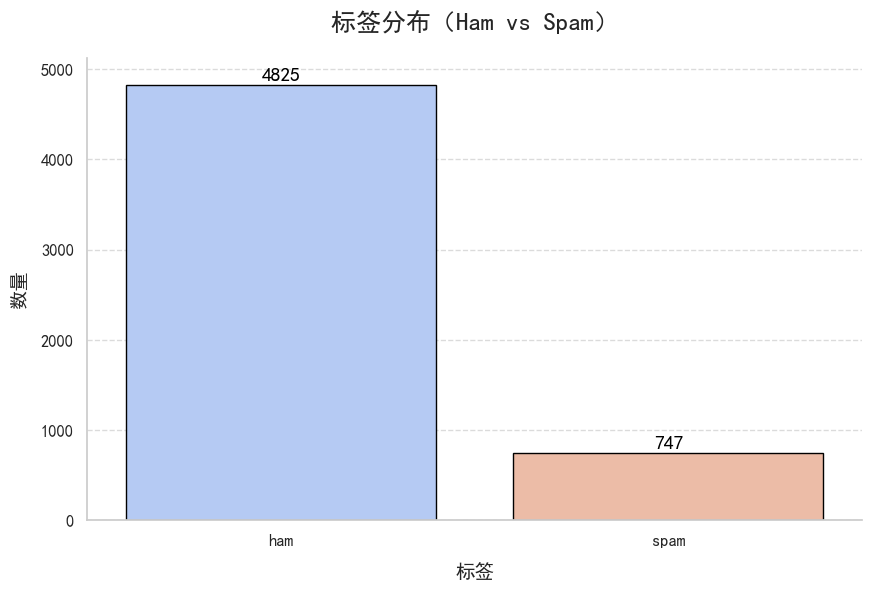

In [302]:
# 假设这是标签分布的数据
label_counts = {'ham': 4825, 'spam': 747}
labels = list(label_counts.keys())
values = list(label_counts.values())

# 创建一个增强版柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette="coolwarm", edgecolor='black', saturation=0.75, hue=None, legend=False)

# 添加数值标签
for i, value in enumerate(values):
    plt.text(i, value + 50, f'{value}', ha='center', fontsize=14, fontweight='bold', color='black')

# 添加标题和轴标签
plt.title("标签分布（Ham vs Spam）", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("标签", fontsize=14, labelpad=10)
plt.ylabel("数量", fontsize=14, labelpad=10)

# 优化轴刻度
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.ylim(0, max(values) + 300)  # 添加一些空白空间以更清晰显示

# 美化图表
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.show()

In [303]:
# 添加短信长度列
data['message_length'] = data['message'].apply(len)

# 拆分数据
ham_lengths = data[data['label'] == 'ham']['message_length']
spam_lengths = data[data['label'] == 'spam']['message_length']

# 绘制直方图
fig = go.Figure()

# 添加 Ham 类别的直方图
fig.add_trace(go.Histogram(
    x=ham_lengths,
    name='Ham',
    marker_color='blue',
    opacity=0.6,
    nbinsx=160  # 分箱数量
))

# 添加 Spam 类别的直方图
fig.add_trace(go.Histogram(
    x=spam_lengths,
    name='Spam',
    marker_color='red',
    opacity=0.6,
    nbinsx=160  # 分箱数量
))

# KDE 曲线拟合
# 对 Ham 类别计算密度估计
ham_kde = gaussian_kde(ham_lengths)
x_ham = np.linspace(min(ham_lengths), max(ham_lengths), 200)
y_ham = ham_kde(x_ham)

# 添加 Ham KDE 曲线
fig.add_trace(go.Scatter(
    x=x_ham,
    y=y_ham * len(ham_lengths) * (max(ham_lengths) - min(ham_lengths)) / 80,  # 调整高度匹配直方图
    mode='lines',
    line=dict(color='blue', width=2),
    name='Ham KDE'
))

# 对 Spam 类别计算密度估计
spam_kde = gaussian_kde(spam_lengths)
x_spam = np.linspace(min(spam_lengths), max(spam_lengths), 200)
y_spam = spam_kde(x_spam)

# 添加 Spam KDE 曲线
fig.add_trace(go.Scatter(
    x=x_spam,
    y=y_spam * len(spam_lengths) * (max(spam_lengths) - min(spam_lengths)) / 80,  # 调整高度匹配直方图
    mode='lines',
    line=dict(color='red', width=2),
    name='Spam KDE'
))

# 更新布局
fig.update_layout(
    title='短信长度分布图（带曲线拟合）',
    xaxis_title='短信长度',
    yaxis_title='短信数量',
    legend_title='标签',
    barmode='overlay',  # 重叠模式，便于比较
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='black'
    ),
    template='plotly_white'
)

# 显示图表
fig.show()

In [304]:
# 添加短信长度列
data['message_length'] = data['message'].apply(len)

# 拆分数据
ham_lengths = data[data['label'] == 'ham']['message_length']
spam_lengths = data[data['label'] == 'spam']['message_length']

# 创建 Plotly 的分布图
fig = ff.create_distplot(
    [ham_lengths, spam_lengths],
    group_labels=['Ham', 'Spam'],
    colors=['blue', 'red'],
    bin_size=5,
    show_hist=True
)

# 更新布局以美化
fig.update_layout(
    title='短信长度分布图',
    xaxis_title='短信长度',
    yaxis_title='分布密度',
    legend_title='标签',
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='black'
    ),
    template='plotly_white'
)

# 显示图表
fig.show()


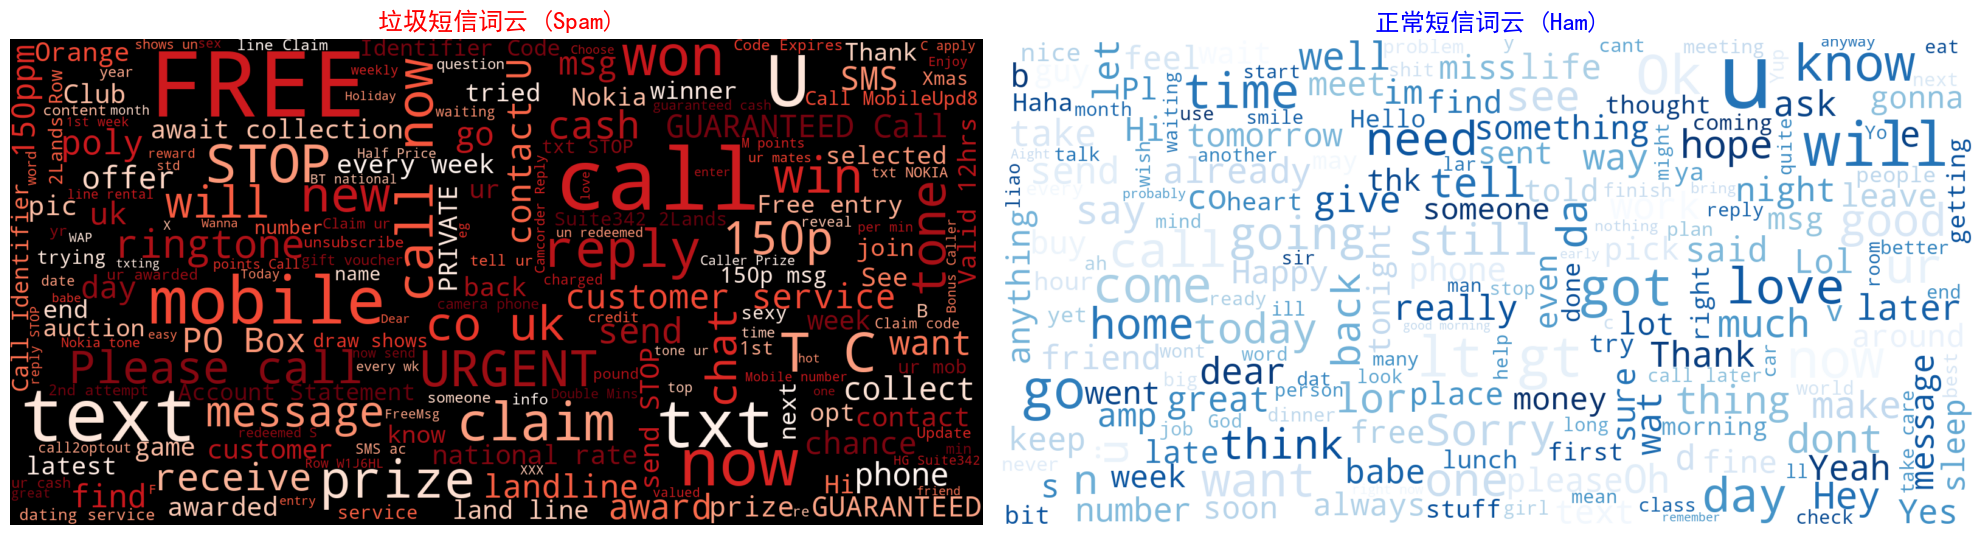

In [305]:
# 创建 DataFrame
df = pd.DataFrame(data)

# 创建垃圾短信和正常短信的文本
spam_messages = " ".join(df[df['label'] == 'spam']['message'])
ham_messages = " ".join(df[df['label'] == 'ham']['message'])

# 生成词云 - 高分辨率美化参数
spam_wordcloud = WordCloud(
    width=1600,  # 宽度提升到1600
    height=800,  # 高度提升到800
    background_color='black',  # 设置背景颜色为黑色，提高对比度
    colormap='Reds',  # 配色方案为红色系，突显垃圾短信
    max_font_size=150,  # 最大字体大小
    min_font_size=15,  # 最小字体大小，增强层次感
    contour_width=2,  # 外轮廓宽度
    contour_color='white',  # 外轮廓颜色
    random_state=42
).generate(spam_messages)

ham_wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',  # 设置背景颜色为白色
    colormap='Blues',  # 配色方案为蓝色系，突显正常短信
    max_font_size=150,
    min_font_size=15,
    contour_width=2,
    contour_color='black',
    random_state=42
).generate(ham_messages)

# 可视化美化后的词云
plt.figure(figsize=(20, 10))  # 调整画布大小

# 垃圾短信词云
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("垃圾短信词云 (Spam)", fontsize=18, fontweight='bold', color='red')
plt.axis("off")  # 去掉坐标轴

# 正常短信词云
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("正常短信词云 (Ham)", fontsize=18, fontweight='bold', color='blue')
plt.axis("off")

# 显示图表
plt.tight_layout()
plt.show()


In [306]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 加载数据
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv",
                   sep='\t', header=None, names=['label', 'message'])

# 将标签转换为数值
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# 分离正常邮件和垃圾邮件
ham_messages = data[data['label'] == 0]['message']
spam_messages = data[data['label'] == 1]['message']

# 使用CountVectorizer提取词频
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# 正常邮件词频
ham_counts = vectorizer.fit_transform(ham_messages)
ham_word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': ham_counts.toarray().sum(axis=0)
}).sort_values(by='frequency', ascending=False)

# 垃圾邮件词频
vectorizer = CountVectorizer(stop_words='english', max_features=20)
spam_counts = vectorizer.fit_transform(spam_messages)
spam_word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': spam_counts.toarray().sum(axis=0)
}).sort_values(by='frequency', ascending=False)

# 打印 Ham 邮件词频表
print("Ham Emails - Top 20 Word Frequencies")
print(ham_word_freq.to_string(index=False))

# 打印 Spam 邮件词频表
print("Spam Emails - Top 20 Word Frequencies")
print(spam_word_freq.to_string(index=False))


Ham Emails - Top 20 Word Frequencies
 word  frequency
   gt        318
   lt        316
 just        297
   ok        288
   ll        266
   ur        247
 know        237
 good        235
 like        234
  got        233
 come        230
  day        212
 love        205
 time        202
going        169
 home        165
 want        165
  lor        162
 need        159
  don        159
Spam Emails - Top 20 Word Frequencies
  word  frequency
  free        224
   txt        163
    ur        144
mobile        127
  text        125
  stop        123
 claim        113
 reply        104
   www         98
 prize         93
  just         79
   won         76
  cash         76
    uk         74
  150p         71
  send         71
   new         69
 nokia         67
   win         64
urgent         63


In [307]:
# 2. 数据预处理
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # 将标签转换为数值
X = data['message']
y = data['label']

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 特征提取
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [308]:
X_train_vec

<3900x7263 sparse matrix of type '<class 'numpy.int64'>'
	with 52150 stored elements in Compressed Sparse Row format>

In [309]:
X_test_vec

<1672x7263 sparse matrix of type '<class 'numpy.int64'>'
	with 20401 stored elements in Compressed Sparse Row format>

In [310]:
# 5. 训练朴素贝叶斯模型
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# 6. 预测与评估
y_pred = nb.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ValueError: Input y contains NaN.